<a href="https://colab.research.google.com/github/ditto0301/thyroid-cancer-recurrence-prediction/blob/main/An%C3%A1lisis_exploratorio_de_recurrencia_en_c%C3%A1ncer_de_tiroides.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# Librerías de análisis y visualización
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Para dividir datos y modelar
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [10]:
# Leer el archivo CSV
df = pd.read_csv("/content/filtered_thyroid_data.csv")

# Mostrar las primeras filas del dataset
df.head()

,Age,Gender,Hx Radiothreapy,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [11]:
# Información general sobre el dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              383 non-null    int64 
 1   Gender           383 non-null    object
 2   Hx Radiothreapy  383 non-null    object
 3   Adenopathy       383 non-null    object
 4   Pathology        383 non-null    object
 5   Focality         383 non-null    object
 6   Risk             383 non-null    object
 7   T                383 non-null    object
 8   N                383 non-null    object
 9   M                383 non-null    object
 10  Stage            383 non-null    object
 11  Response         383 non-null    object
 12  Recurred         383 non-null    object
dtypes: int64(1), object(12)
memory usage: 39.0+ KB


In [12]:
# Verificar si hay valores nulos
df.isnull().sum()

,0
Age,0
Gender,0
Hx Radiothreapy,0
Adenopathy,0
Pathology,0
Focality,0
Risk,0
T,0
N,0
M,0


In [13]:
# Estadísticas descriptivas de las columnas numéricas
df.describe()

,Age
count,383.000000
mean,40.866841
std,15.134494
min,15.000000
25%,29.000000
50%,37.000000
75%,51.000000
max,82.000000


In [15]:
# Verificar los nombres de las columnas
df.columns

Index(['Age', 'Gender', 'Hx Radiothreapy', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred'],
      dtype='object')

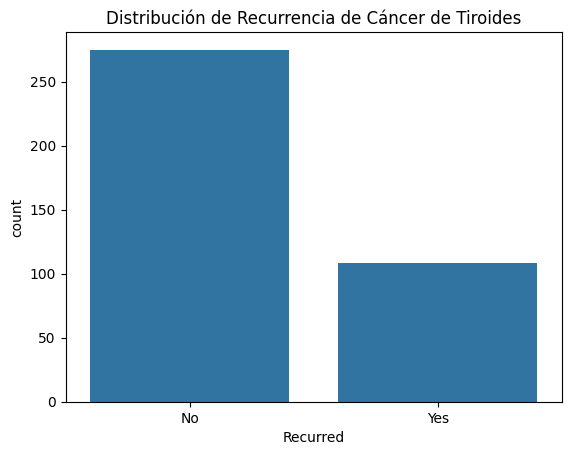

In [16]:
# Visualización de la variable 'Recurred'
sns.countplot(x='Recurred', data=df)
plt.title("Distribución de Recurrencia de Cáncer de Tiroides")
plt.show()


In [18]:
# Limpiar datos (eliminación de valores nulos, si es necesario)
df_clean = df.dropna()

# Ver las primeras filas del DataFrame limpio
df_clean.head()

,Age,Gender,Hx Radiothreapy,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


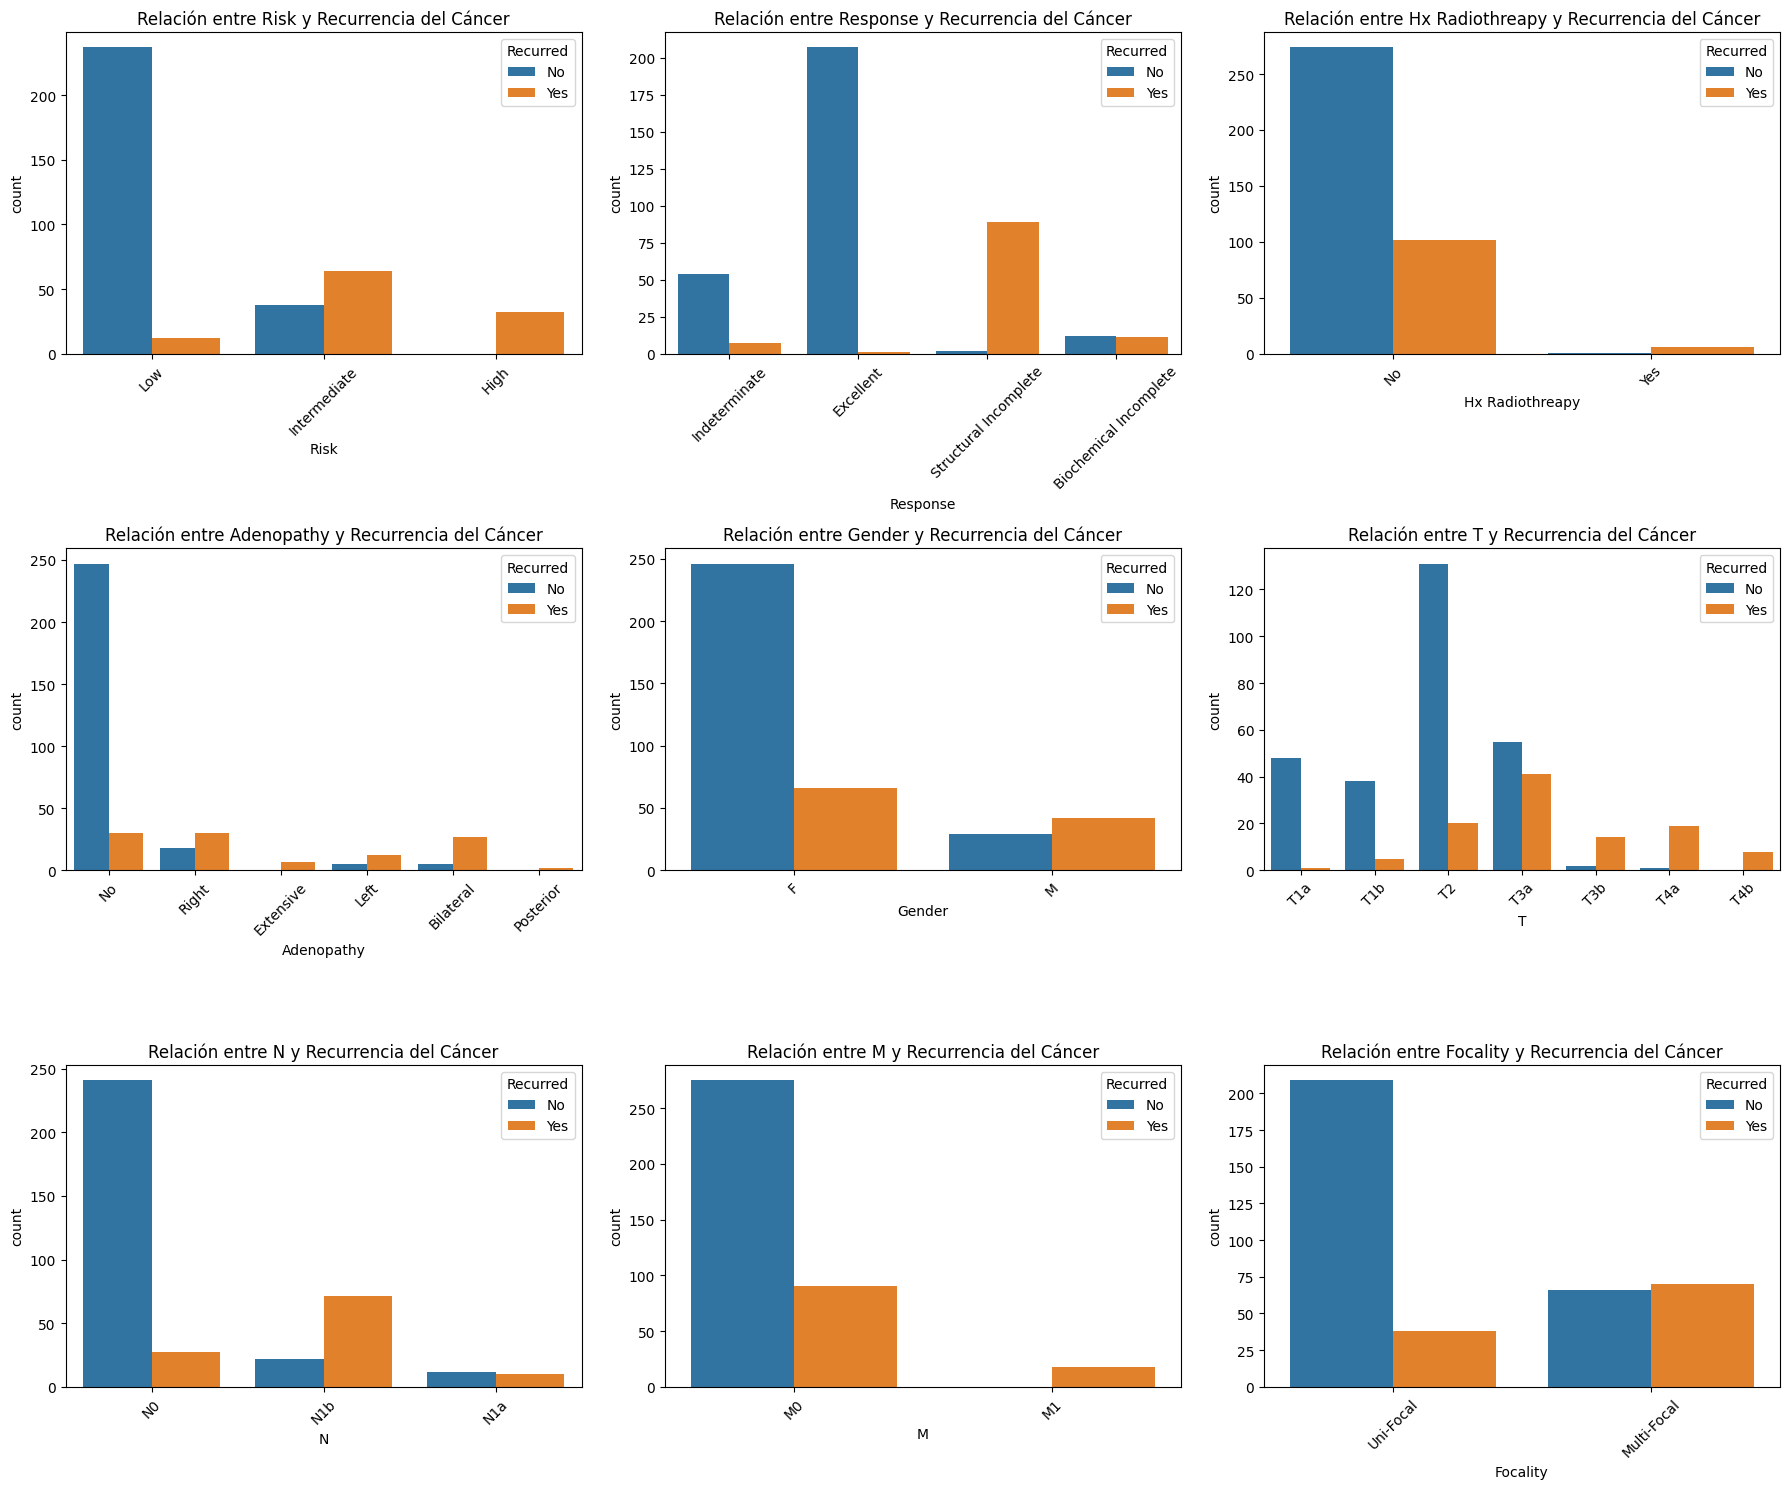

In [29]:
# Visualización de la relación entre las variables categóricas (incluyendo TNM) y la recurrencia
plt.figure(figsize=(18, 15))  # Aumento el tamaño de la figura

# Variables categóricas que exploraremos, incluidas las variables TNM
categorical_columns = ['Risk', 'Response', 'Hx Radiothreapy', 'Adenopathy', 'Gender', 'T', 'N', 'M', 'Focality']

# Creación de gráficos de barras para cada variable
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)  # Ahora tenemos 3 filas y 3 columnas de subgráficos
    sns.countplot(x=col, hue='Recurred', data=df_clean)
    plt.title(f'Relación entre {col} y Recurrencia del Cáncer')

    # Rotación de etiquetas del eje X para evitar superposición
    plt.xticks(rotation=45)

plt.tight_layout()  # Ajuste automático de la disposición de los subgráficos
plt.show()

VALIDACIÓN ESTADÍSTICA:
Prueba de Chi

In [30]:
import scipy.stats as stats

# Función para realizar la prueba Chi-cuadrado
def chi_square_test(variable):
    # Crear la tabla de contingencia
    contingency_table = pd.crosstab(df['Recurred'], df[variable])

    # Realizar la prueba Chi-cuadrado
    chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)

    # Mostrar resultados
    print(f"Chi-cuadrado para {variable}:")
    print(f"Estadístico Chi-cuadrado: {chi2}")
    print(f"p-valor: {p_value}")
    print("\n" + "-"*50)

# Realizar la prueba Chi-cuadrado para las variables seleccionadas
variables_to_test = ['Response', 'Hx Radiothreapy', 'T', 'N', 'M', 'Gender', 'Risk', 'Focality']

for var in variables_to_test:
    chi_square_test(var)


Chi-cuadrado para Response:
Estadístico Chi-cuadrado: 309.47232144451004
p-valor: 8.863123780463506e-67

--------------------------------------------------
Chi-cuadrado para Hx Radiothreapy:
Estadístico Chi-cuadrado: 8.9360505479056
p-valor: 0.002795966115812055

--------------------------------------------------
Chi-cuadrado para T:
Estadístico Chi-cuadrado: 141.2902457324513
p-valor: 5.353537306538738e-28

--------------------------------------------------
Chi-cuadrado para N:
Estadístico Chi-cuadrado: 153.1867635060231
p-valor: 5.443985431857947e-34

--------------------------------------------------
Chi-cuadrado para M:
Estadístico Chi-cuadrado: 44.44440560731619
p-valor: 2.616836848791985e-11

--------------------------------------------------
Chi-cuadrado para Gender:
Estadístico Chi-cuadrado: 39.396676469993665
p-valor: 3.4588517738589313e-10

--------------------------------------------------
Chi-cuadrado para Risk:
Estadístico Chi-cuadrado: 208.82620309719766
p-valor: 4.507815

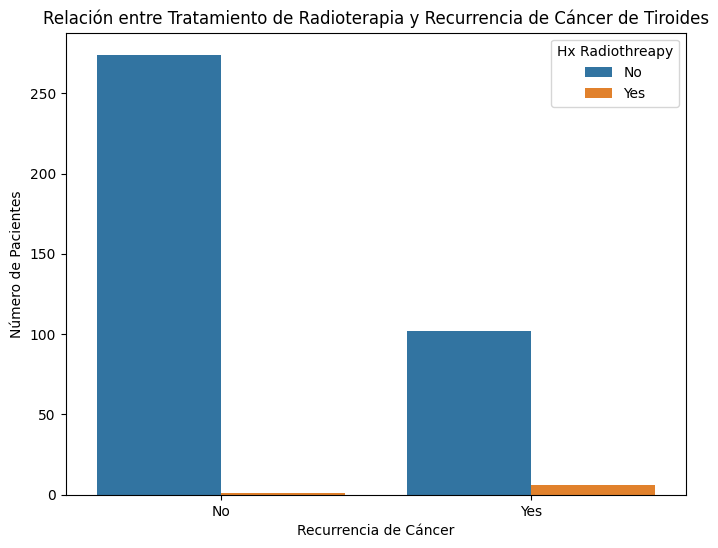

In [27]:
# Visualización detallada de la relación entre radioterapia y recurrencia
plt.figure(figsize=(8, 6))
sns.countplot(x='Recurred', hue='Hx Radiothreapy', data=df)
plt.title('Relación entre Tratamiento de Radioterapia y Recurrencia de Cáncer de Tiroides')
plt.xlabel('Recurrencia de Cáncer')
plt.ylabel('Número de Pacientes')
plt.show()


Modelo Predictivo

In [63]:
from sklearn.preprocessing import LabelEncoder

# Creamos un encoder
label_encoder = LabelEncoder()

# Aplicamos el encoding a las columnas categóricas
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Focality'] = label_encoder.fit_transform(df['Focality'])
df['Hx Radiothreapy'] = label_encoder.fit_transform(df['Hx Radiothreapy'])
df['Risk'] = label_encoder.fit_transform(df['Risk'])
df['Response'] = label_encoder.fit_transform(df['Response'])

# Verificar los valores únicos de cada columna para asegurarse que se ha hecho correctamente
print("Valores únicos en 'Gender':", df['Gender'].unique())
print("Valores únicos en 'Focality':", df['Focality'].unique())
print("Valores únicos en 'Hx Radiothreapy':", df['Hx Radiothreapy'].unique())
print("Valores únicos en 'Risk':", df['Risk'].unique())
print("Valores únicos en 'Response':", df['Response'].unique())


Valores únicos en 'Gender': [0 1]
Valores únicos en 'Focality': [1 0]
Valores únicos en 'Hx Radiothreapy': [0 1]
Valores únicos en 'Risk': [2 1 0]
Valores únicos en 'Response': [2 1 3 0]


In [34]:
# Definir las variables predictoras (X) y la variable objetivo (y)
X = df[['T', 'N', 'M', 'Gender', 'Focality', 'Hx Radiothreapy', 'Risk', 'Response']]  # Variables independientes
y = df['Recurred'].map({'Yes': 1, 'No': 0})  # Convertimos 'Yes' a 1 y 'No' a 0


In [35]:
from sklearn.model_selection import train_test_split

# Dividir el dataset en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [40]:
from sklearn.preprocessing import LabelEncoder

# Definir el codificador
label_encoder = LabelEncoder()

# Codificar las variables categóricas
df['T'] = df['T'].map({'T1': 1, 'T2': 2, 'T3': 3, 'T4': 4})
df['N'] = df['N'].map({'N0': 0, 'N1': 1, 'N2': 2, 'N3': 3, 'N4': 4})
df['M'] = df['M'].map({'M0': 0, 'M1': 1})

# Codificar las demás variables categóricas (Gender, Focality, Radiotherapy, Risk, Response)
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Focality'] = label_encoder.fit_transform(df['Focality'])
df['Hx Radiothreapy'] = label_encoder.fit_transform(df['Hx Radiothreapy'])
df['Risk'] = label_encoder.fit_transform(df['Risk'])
df['Response'] = label_encoder.fit_transform(df['Response'])

# Verificamos si todas las columnas se han codificado correctamente
print(df.dtypes)


Age                  int64
Gender               int64
Hx Radiothreapy      int64
Adenopathy          object
Pathology           object
Focality             int64
Risk                 int64
T                  float64
N                  float64
M                  float64
Stage               object
Response             int64
Recurred            object
dtype: object


In [54]:
# Convertir las columnas 'T', 'N' y 'M' a tipo categórico
df['T'] = df['T'].astype('category')
df['N'] = df['N'].astype('category')
df['M'] = df['M'].astype('category')

# Verificar el tipo de datos después de la conversión
print(df[['T', 'N', 'M']].dtypes)


T    category
N    category
M    category
dtype: object


In [55]:
from sklearn.preprocessing import LabelEncoder

# Inicializar el codificador
label_encoder = LabelEncoder()

# Convertir las columnas categóricas a valores numéricos
df['T'] = label_encoder.fit_transform(df['T'])
df['N'] = label_encoder.fit_transform(df['N'])
df['M'] = label_encoder.fit_transform(df['M'])

# Verificar las primeras filas después de la conversión
print(df[['T', 'N', 'M']].head())


   T  N  M
0  0  0  0
1  0  0  0
2  0  0  0
3  0  0  0
4  0  0  0


In [56]:
# Verificar los valores únicos después de la conversión
print("Valores únicos en la columna 'T':", df['T'].unique())
print("Valores únicos en la columna 'N':", df['N'].unique())
print("Valores únicos en la columna 'M':", df['M'].unique())


Valores únicos en la columna 'T': [0 1 2 3 4 5 6]
Valores únicos en la columna 'N': [0 2 1]
Valores únicos en la columna 'M': [0 1]


In [58]:
from sklearn.model_selection import train_test_split

# Definir las variables predictoras (X) y la variable objetivo (y)
X = df[['T', 'N', 'M', 'Gender', 'Focality', 'Hx Radiothreapy', 'Risk', 'Response']]
y = df['Recurred']

# Dividir el dataset en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar el tamaño de los conjuntos
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")


Tamaño del conjunto de entrenamiento: (306, 8)
Tamaño del conjunto de prueba: (77, 8)


In [65]:
# Definir las variables predictoras (X) y la variable objetivo (y)
X = df[['T', 'N', 'M', 'Gender', 'Focality', 'Hx Radiothreapy', 'Risk', 'Response']]
y = df['Recurred']

# Dividir el dataset en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión logística
model = LogisticRegression(max_iter=1000)

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Hacer predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
print("Exactitud del modelo:", accuracy_score(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred))


Exactitud del modelo: 0.935064935064935

Reporte de clasificación:
               precision    recall  f1-score   support

          No       0.93      0.98      0.96        58
         Yes       0.94      0.79      0.86        19

    accuracy                           0.94        77
   macro avg       0.94      0.89      0.91        77
weighted avg       0.94      0.94      0.93        77


Matriz de confusión:
 [[57  1]
 [ 4 15]]


1. Exactitud del Modelo (Accuracy):
0.94 (94%): Este es un valor bastante bueno, lo que significa que el modelo está acertando en el 94% de las predicciones. Aunque este valor es alto, no siempre es suficiente si las clases están desbalanceadas, por lo que es útil observar las métricas adicionales.

2. Reporte de Clasificación:
Para la clase "No" (sin recurrencia):

Precisión: 0.93 → El modelo tiene un 93% de precisión al predecir que un paciente no tendrá recurrencia.

Recall: 0.98 → El modelo detecta el 98% de los pacientes que realmente no tendrán recurrencia. Es un valor excelente.

F1-score: 0.96 → Un buen valor de f1-score, que indica un buen balance entre precisión y recall.

Para la clase "Yes" (con recurrencia):

Precisión: 0.94 → El modelo tiene un 94% de precisión al predecir que un paciente sí tendrá recurrencia.

Recall: 0.79 → Solo detecta el 79% de los casos reales de recurrencia, lo que podría indicar que hay margen de mejora aquí.

F1-score: 0.86 → Un buen f1-score para la clase de recurrencia, pero ligeramente inferior al de la clase "No".

3. Matriz de Confusión:
Verdaderos Positivos (TP): 57 pacientes sin recurrencia predichos correctamente.

Falsos Positivos (FP): 1 paciente sin recurrencia, pero que el modelo predijo con recurrencia (falso positivo).

Verdaderos Negativos (TN): 15 pacientes con recurrencia predichos correctamente.

Falsos Negativos (FN): 4 pacientes con recurrencia que el modelo no identificó correctamente (falsos negativos).

La matriz de confusión muestra que el modelo tiene más éxito identificando pacientes sin recurrencia (con un recall del 98%) que a los pacientes con recurrencia (con un recall del 79%). Esto se refleja en el mayor número de falsos negativos (4) en la clase "Yes" (recurrencia).

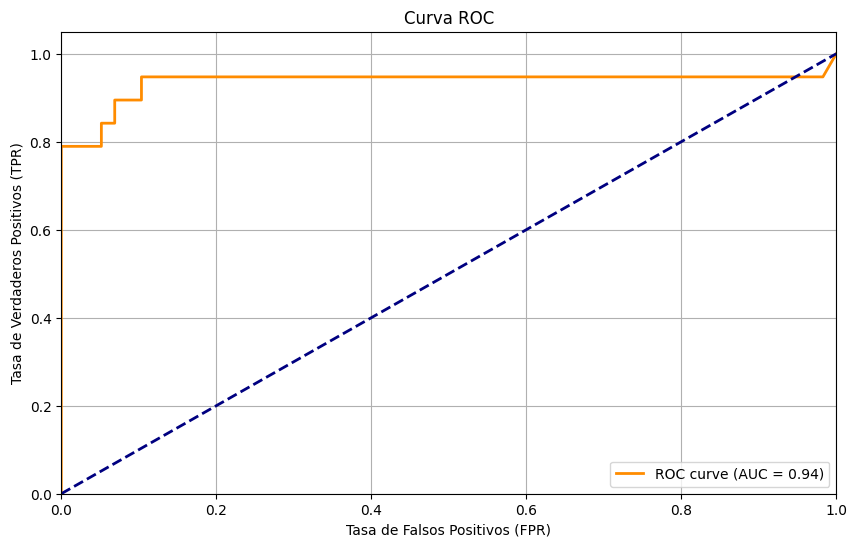

AUC: 0.9360254083484574


In [103]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Convertir las etiquetas 'Yes'/'No' a valores numéricos 1/0
y_test_numeric = y_test.map({'No': 0, 'Yes': 1})

# Obtener las probabilidades de predicción para la clase positiva (Yes)
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilidades de la clase "Yes"

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test_numeric, y_prob)

# Calcular el AUC
roc_auc = auc(fpr, tpr)

# Trazar la curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Línea diagonal (modelo aleatorio)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Mostrar el AUC
print(f"AUC: {roc_auc}")
